In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('default')

In [3]:
df = pd.read_csv('./resources/60min_x1_with_outlier_summary.csv', header=[0], index_col=[0])
df

,noRET_RET,noRET_EM,noRET_SRT,10min_RET,10min_EM,10min_SRT,1h_RET,1h_EM,1h_SRT,6h_RET,6h_EM,6h_SRT
animal,,,,,,,,,,,,
#1,53.333333,27.483333,NaN,70.266667,51.400000,NaN,18.900000,3.050000,NaN,28.050000,2.766667,NaN
#2,26.366667,17.216667,NaN,28.350000,0.000000,NaN,30.283333,14.716667,NaN,42.800000,28.333333,NaN
#3,70.266667,38.883333,NaN,26.933333,10.000000,NaN,44.150000,6.666667,NaN,62.216667,19.983333,NaN
#4,42.783333,35.000000,NaN,72.483333,40.833333,NaN,69.983333,51.950000,NaN,18.066667,4.983333,NaN
#5,38.616667,16.383333,NaN,63.633333,67.216667,NaN,67.500000,16.116667,NaN,48.066667,5.000000,NaN
#6,39.183333,16.383333,NaN,46.950000,18.883333,NaN,38.600000,7.783333,NaN,37.216667,10.566667,NaN
#7,18.883333,47.766667,NaN,35.833333,27.500000,NaN,36.933333,13.600000,NaN,64.166667,19.733333,NaN
#8,55.566667,36.133333,NaN,35.283333,36.666667,NaN,67.783333,26.100000,NaN,32.766667,20.000000,NaN
#9,46.650000,35.566667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


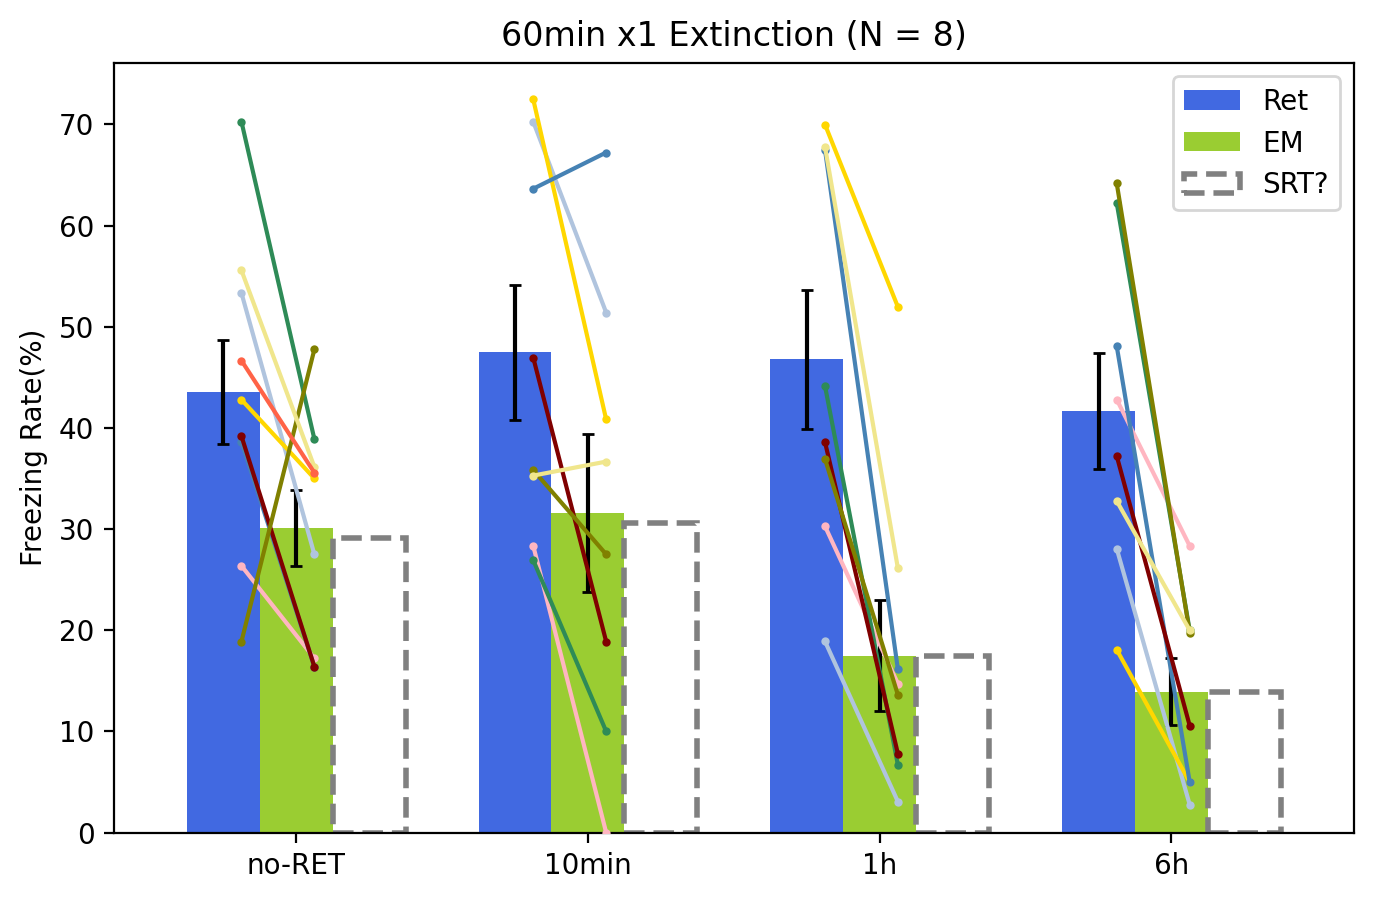

In [5]:
labels = np.array(['no-RET', '10min', '1h', '6h'])

ret = df.iloc[:, [0, 3, 6, 9]]
em  = df.iloc[:, [1, 4, 7, 10]]
srt = df.iloc[:, [2, 5, 8, 11]]

ret_mean, ret_sem = ret.mean(), ret.sem()
em_mean, em_sem   = em.mean(), em.sem()
srt_mean, srt_sem = srt.mean(), srt.sem()
demo_srt_mean = em_mean + np.random.randint(-3.0, 3.0, len(srt_mean))  # data for srt sample

left = np.arange(0.0, 4.9, 1.6)
width = 0.40

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
# ax.bar(x=left + width, height=srt_mean, yerr=srt_sem, capsize=2, width=width, label='SRT', align='center', color='gray')
ax.bar(x=left + width, height=demo_srt_mean, yerr=srt_sem, capsize=2, width=width, label='SRT?', align='center', fill=False, ls='--', ec='gray', lw='2') # view sample
ax.set_xticks([0.0, 1.6, 3.2, 4.8])
ax.set_xticklabels(labels=labels)

x_no = list(np.arange(-0.3, 0.6, 0.4))
x_10min = list(np.arange(1.3, 2.2, 0.4))
x_1h = list(np.arange(2.9, 3.8, 0.4))
x_6h = list(np.arange(4.5, 5.4, 0.4))

colors = [
    'lightsteelblue',
    'lightpink',
    'seagreen',
    'gold',
    'steelblue',
    'maroon',
    'olive',
    'khaki',
    'tomato'
]
for animal_number in range(9):
    plt.plot(x_no, df.iloc[animal_number, 0:3], zorder=12, marker='o', markersize=2, c=colors[animal_number])
    if animal_number < 8:
        plt.plot(x_10min, df.iloc[animal_number, 3:6], zorder=12, marker='o', markersize=2, c=colors[animal_number])
        plt.plot(x_1h, df.iloc[animal_number, 6:9], zorder=12, marker='o', markersize=2, c=colors[animal_number])
        plt.plot(x_6h, df.iloc[animal_number, 9:12], zorder=12, marker='o', markersize=2, c=colors[animal_number])

ax.set_xlim(-1.0, 5.8)
ax.set_ylabel('Freezing Rate(%)')
ax.set_title('60min x1 Extinction (N = 8)')
ax.legend()
fig.show()

In [6]:
diff_df = pd.DataFrame(columns=['no-RET', '10min', '1h', '6h'], index=df.index)
diff_df

,no-RET,10min,1h,6h
animal,,,,
#1,NaN,NaN,NaN,NaN
#2,NaN,NaN,NaN,NaN
#3,NaN,NaN,NaN,NaN
#4,NaN,NaN,NaN,NaN
#5,NaN,NaN,NaN,NaN
#6,NaN,NaN,NaN,NaN
#7,NaN,NaN,NaN,NaN
#8,NaN,NaN,NaN,NaN
#9,NaN,NaN,NaN,NaN


In [7]:
for animal_number, row in df.iterrows():
    diff_no = row['noRET_RET'] - row['noRET_EM']
    diff_10min = row['10min_RET'] - row['10min_EM']
    diff_1h = row['1h_RET'] - row['1h_EM']
    diff_6h = row['6h_RET'] - row['6h_EM']

    diff_df.loc[animal_number, :] = [diff_no, diff_10min, diff_1h, diff_6h]

diff_df

,no-RET,10min,1h,6h
animal,,,,
#1,25.85,18.866667,15.85,25.283333
#2,9.15,28.35,15.566667,14.466667
#3,31.383333,16.933333,37.483333,42.233333
#4,7.783333,31.65,18.033333,13.083333
#5,22.233333,-3.583333,51.383333,43.066667
#6,22.8,28.066667,30.816667,26.65
#7,-28.883333,8.333333,23.333333,44.433333
#8,19.433333,-1.383333,41.683333,12.766667
#9,11.083333,NaN,NaN,NaN


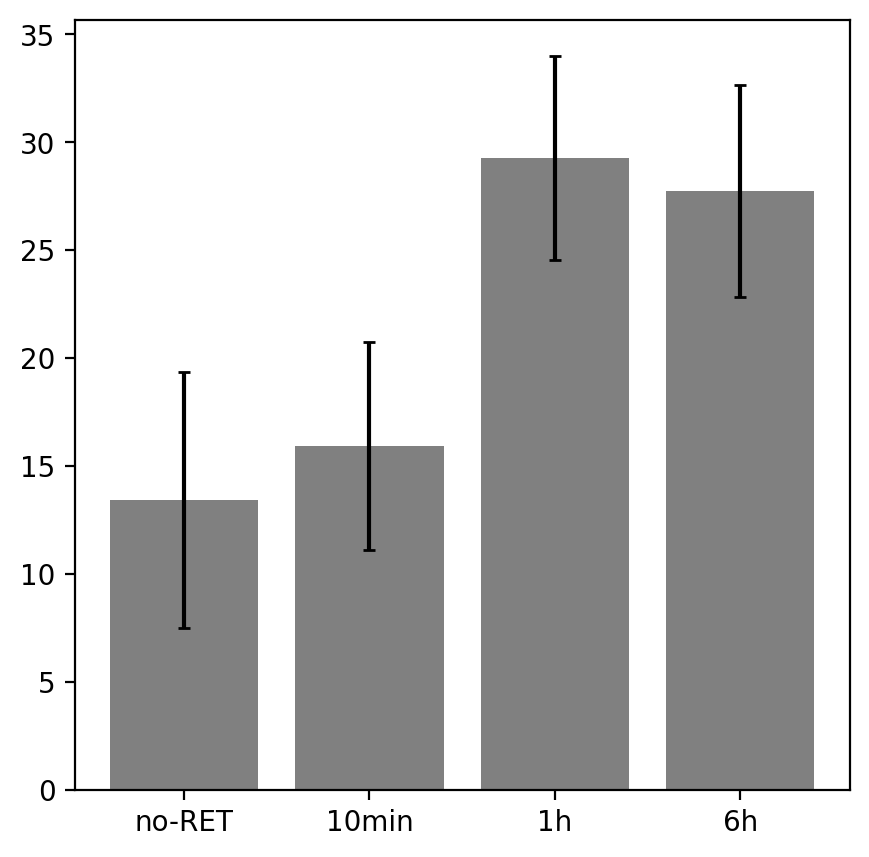

In [8]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

for index, (interval, items) in enumerate(diff_df.iteritems()):
    mean, sem = items.mean(), items.sem()

    ax.bar(x=index, height=mean, yerr=sem, capsize=2, label=interval, align='center', color='gray')

ax.set_xticks(list(range(4)))
ax.set_xticklabels(labels=diff_df.columns)
plt.show()

In [9]:
import seaborn as sns

In [10]:
seaborn_df = pd.DataFrame(columns=['animal', 'interval', 'freezing'])
seaborn_df

,animal,interval,freezing


In [11]:
animals = []
intervals = []
freezings = []

for interval, items in diff_df.iteritems():
    animals.extend(diff_df.index.to_list())
    intervals.extend([interval] * len(items))
    freezings.extend(items.to_list())

seaborn_df['animal'] = animals
seaborn_df['interval'] = intervals
seaborn_df['freezing'] = freezings

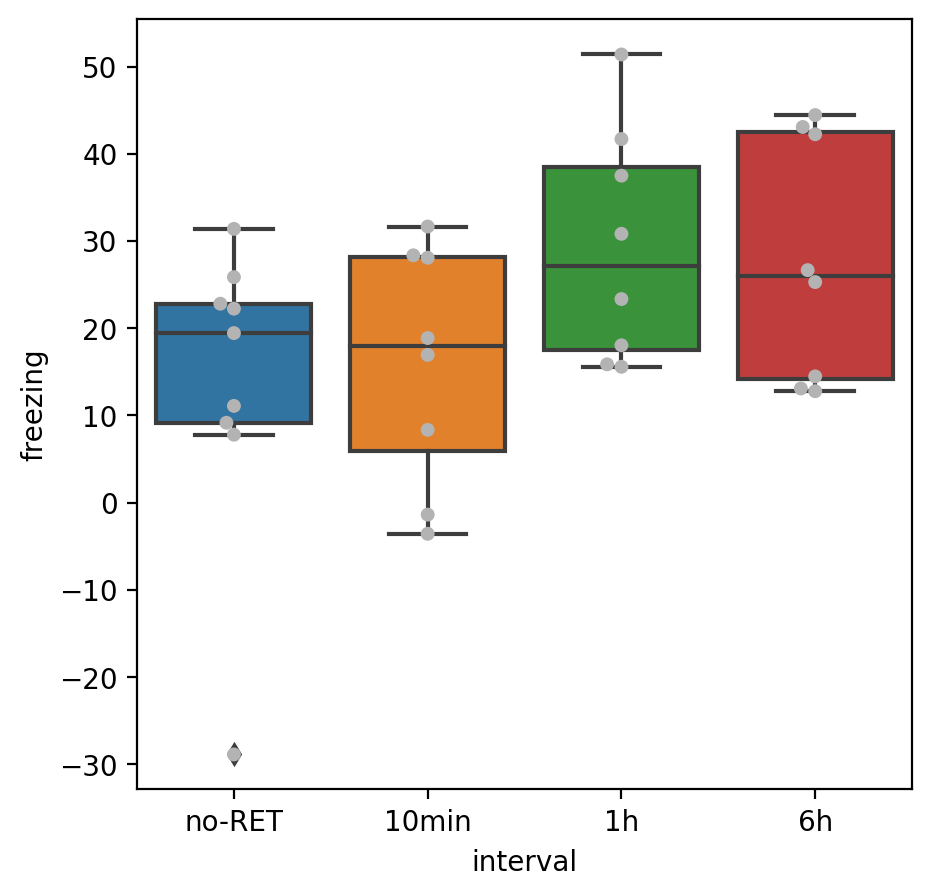

In [12]:
fig, ax = plt.subplots(figsize=(5,5), dpi=200)

sns.boxplot(x=seaborn_df['interval'], y=seaborn_df['freezing'], ax=ax)
sns.swarmplot(x=seaborn_df['interval'], y=seaborn_df['freezing'], ax=ax, color='0.7')

plt.show()